In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image
import pickle

In [2]:
path = 'results/LE_nLED_cifer5/'

## load data

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
print(len(X_train))
print(len(X_test))
print(X_train.shape)

50000
10000
(50000, 32, 32, 3)


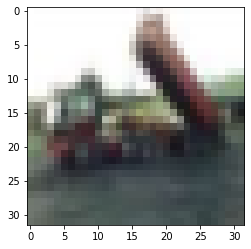

In [5]:
imgplot = plt.imshow(X_train[2])
plt.show()

## preprocessing/F.E.

## set parameter

# imageshuffle

In [6]:
train_data = pd.DataFrame({'x':[*X_train],'y':[*Y_train]})
test_data = pd.DataFrame({'x':[*X_test],'y':[*Y_test]})
train_data = train_data.loc[train_data['y']<5].reset_index(drop=True)
test_data = test_data.loc[test_data['y']<5].reset_index(drop=True)
data = [train_data,test_data]

In [7]:
for d in data:
    d['nor_x'] = d['x'].apply(lambda x:x/255)
    d['cate_y']=[*tf.keras.utils.to_categorical(d['y'])]

In [8]:
from moudule.BlockScramble import BlockScramble

In [9]:
bs = BlockScramble([4, 4, 3])
bs.save(path+'key/key.pkl')
for d in data:
    d['bs_x'] = [*bs.Scramble(np.array(list(d['nor_x'])))]
    d['bs_d'] = [*bs.Decramble(np.array(list(d['bs_x'])))]

In [10]:
data[0]

,index,x,y,nor_x,cate_y,bs_x,bs_d
0,3,"[[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...",[4],"[[[0.10980392156862745, 0.09803921568627451, 0...","[0.0, 0.0, 0.0, 0.0, 1.0]","[[[0.93333334, 0.88235295, 0.49019608], [0.803...","[[[0.10980392, 0.09803922, 0.039215688], [0.14..."
1,4,"[[[170, 180, 198], [168, 178, 196], [177, 185,...",[1],"[[[0.6666666666666666, 0.7058823529411765, 0.7...","[0.0, 1.0, 0.0, 0.0, 0.0]","[[[0.6039216, 0.29411766, 0.5764706], [0.34901...","[[[0.6666667, 0.7058824, 0.7764706], [0.658823..."
2,5,"[[[159, 102, 101], [150, 91, 95], [153, 95, 97...",[1],"[[[0.6235294117647059, 0.4, 0.396078431372549]...","[0.0, 1.0, 0.0, 0.0, 0.0]","[[[0.14509805, 0.7058824, 0.3019608], [0.70980...","[[[0.62352943, 0.4, 0.39607844], [0.5882353, 0..."
3,6,"[[[164, 206, 84], [105, 140, 61], [118, 148, 1...",[2],"[[[0.6431372549019608, 0.807843137254902, 0.32...","[0.0, 0.0, 1.0, 0.0, 0.0]","[[[0.11764706, 0.16470589, 0.73333335], [0.321...","[[[0.6431373, 0.80784315, 0.32941177], [0.4117..."
4,9,"[[[125, 125, 116], [110, 101, 91], [102, 90, 8...",[3],"[[[0.49019607843137253, 0.49019607843137253, 0...","[0.0, 0.0, 0.0, 1.0, 0.0]","[[[0.7411765, 0.4117647, 0.1764706], [0.129411...","[[[0.49019608, 0.49019608, 0.45490196], [0.431..."
...,...,...,...,...,...,...,...
24995,49993,"[[[226, 214, 177], [225, 212, 177], [225, 207,...",[1],"[[[0.8862745098039215, 0.8392156862745098, 0.6...","[0.0, 1.0, 0.0, 0.0, 0.0]","[[[0.2627451, 0.29411766, 0.5529412], [0.90196...","[[[0.8862745, 0.8392157, 0.69411767], [0.88235..."
24996,49994,"[[[156, 159, 164], [155, 158, 163], [156, 159,...",[0],"[[[0.611764705882353, 0.6235294117647059, 0.64...","[1.0, 0.0, 0.0, 0.0, 0.0]","[[[0.3137255, 0.3529412, 0.32156864], [0.09803...","[[[0.6117647, 0.62352943, 0.6431373], [0.60784..."
24997,49995,"[[[145, 161, 194], [151, 166, 199], [156, 171,...",[2],"[[[0.5686274509803921, 0.6313725490196078, 0.7...","[0.0, 0.0, 1.0, 0.0, 0.0]","[[[0.81960785, 0.3529412, 0.13725491], [0.5882...","[[[0.5686275, 0.6313726, 0.7607843], [0.592156..."
24998,49998,"[[[189, 211, 240], [186, 208, 236], [185, 207,...",[1],"[[[0.7411764705882353, 0.8274509803921568, 0.9...","[0.0, 1.0, 0.0, 0.0, 0.0]","[[[0.78039217, 0.17254902, 0.3764706], [0.1411...","[[[0.7411765, 0.827451, 0.9411765], [0.7294118..."


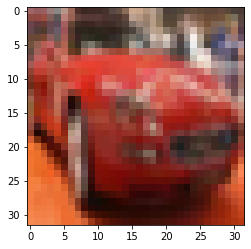

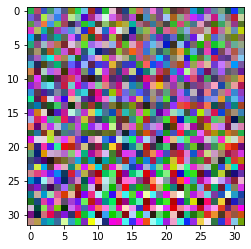

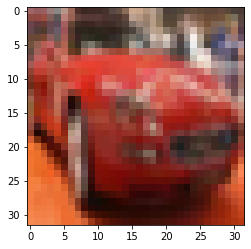

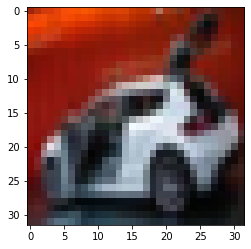

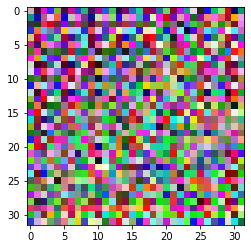

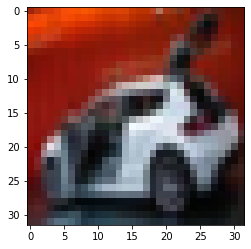

In [11]:
i = 2
for d in data:
    plt.imshow(d['x'][i])
    plt.show()
    plt.imshow(d['bs_x'][i])
    plt.show()
    plt.imshow(d['bs_d'][i])
    plt.show()

In [12]:
data[0]['train_x'] = data[0]['bs_x']
data[0]['train_y'] = data[0]['cate_y']
data[1]['test_x'] = data[1]['bs_x']
data[1]['test_y'] = data[1]['cate_y']

In [13]:
train_x =np.array([[*a]for a in data[0]['train_x']])
train_y =np.array([[*a]for a in data[0]['train_y']])
test_x =np.array([[*a]for a in data[1]['test_x']])
test_y =np.array([[*a]for a in data[1]['test_y']])

## Training

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Input,\
                                    Lambda,MaxPooling2D, GlobalAveragePooling2D,\
                                    Add, Concatenate,BatchNormalization
from tensorflow.keras.models import Model

from moudule.padding import PaddingReplicate2D
from moudule.pixelshuffle import PixelShuffle
from moudule.pixelshuffle import PixelShuffle_calc, PixelShuffle_shape

from keras.metrics import categorical_accuracy
from tensorflow.keras.callbacks import CSVLogger

In [15]:
def resnet1(input_shape, nb_classes=10):
    p1 = PaddingReplicate2D((1,1))
    inp = Input(shape=input_shape)
    x = inp

    # block0 ####################################################
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (4,4), padding='valid', strides=(4,4), kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48
    
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*32, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = PixelShuffle( x, 4 )
#     x = Conv2D(32, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    # 32x32x32
    
    # block1 ####################################################
    f = 32
    fs = 16
    for i in range(2):
        f0 = f
        f = f+fs
        r = x[:]
        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))
        
        r = Dropout(0.25) (r)
        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0)) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)
        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]

        x = Add() ([x,r0])
        x = Concatenate(axis=-1) ([x,r1])
    # 32x32x64
    
    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 16x16x64
    # block2 ####################################################
    f = 64
    fs = 32
    for i in range(2):
        f0 = f
        f = f+fs
        r = x

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = Dropout(0.25) (r)

        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0) ) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)

        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]
        x = Add() ( [x,r0] )
        x = Concatenate(axis=-1) ([x,r1])

        f0 = f
    # 16x16x128

    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 8x8x128

    # block3 ####################################################
    f = 128
    fs = 64
    for i in range(2):
        f0 = f
        f = f+fs
        r = x

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = Dropout(0.25) (r)

        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0) ) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)

        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]
        x = Add() ( [x,r0] )
        x = Concatenate(axis=-1) ([x,r1])

        f0 = f
    # 8x8x256

    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 4x4x256

    # block4 ####################################################
    x = Dropout(0.5) (x)
    x = Conv2D( 512, (1,1), padding='valid', kernel_initializer='he_normal', activation='relu' ) (x)

    x = Dropout(0.5) (x)
    x = Conv2D( nb_classes, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = GlobalAveragePooling2D() (x)
    x = Activation('softmax') (x)

    return Model(inputs=inp, outputs=x)

In [16]:
model = resnet1(input_shape=[32,32,3], nb_classes=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 3)   12          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 48)     2352        ['batch_normalization[0][0]']    
                                                                                                  
 activation (Activation)        (None, 8, 8, 48)     0           ['conv2d[0][0]']             

 rmalization)                                                    ]']                              
                                                                                                  
 activation_5 (Activation)      (None, 32, 32, 48)   0           ['batch_normalization_6[0][0]']  
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 64)   27712       ['padding_replicate2d[2][0]']    
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 32, 32, 64)   0           ['batch_normalization_7[0][0]']  
          

                                                                                                  
 tf.__operators__.getitem_9 (Sl  (None, 16, 16, 32)  0           ['dropout_3[0][0]']              
 icingOpLambda)                                                                                   
                                                                                                  
 concatenate_3 (Concatenate)    (None, 16, 16, 128)  0           ['add_3[0][0]',                  
                                                                  'tf.__operators__.getitem_9[0][0
                                                                 ]']                              
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 128)   0           ['concatenate_3[0][0]']          
                                                                                                  
 batch_nor

 activation_15 (Activation)     (None, 5)            0           ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
Total params: 2,254,337
Trainable params: 2,251,355
Non-trainable params: 2,982
__________________________________________________________________________________________________


Epoch 1/50
391/391 [==============================] - 66s 152ms/step - loss: 1.9179 - accuracy: 0.3430 - val_loss: 2.9570 - val_accuracy: 0.2520
Epoch 2/50
391/391 [==============================] - 58s 149ms/step - loss: 1.2903 - accuracy: 0.4707 - val_loss: 1.6642 - val_accuracy: 0.3038
Epoch 3/50
391/391 [==============================] - 59s 152ms/step - loss: 1.1264 - accuracy: 0.5373 - val_loss: 1.5201 - val_accuracy: 0.3884
Epoch 4/50
391/391 [==============================] - 60s 154ms/step - loss: 1.0201 - accuracy: 0.5860 - val_loss: 1.2580 - val_accuracy: 0.4690
Epoch 5/50
391/391 [==============================] - 61s 156ms/step - loss: 0.9401 - accuracy: 0.6178 - val_loss: 1.1482 - val_accuracy: 0.4866
Epoch 6/50
391/391 [==============================] - 61s 157ms/step - loss: 0.8806 - accuracy: 0.6464 - val_loss: 1.1857 - val_accuracy: 0.5052
Epoch 7/50
391/391 [==============================] - 62s 158ms/step - loss: 0.8238 - accuracy: 0.6696 - val_loss: 1.0478 - val_ac

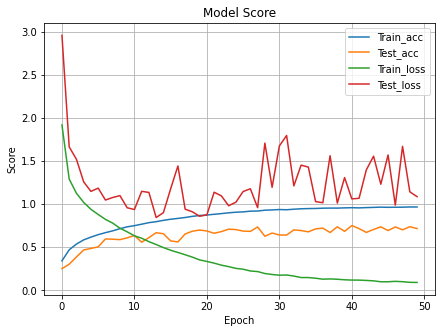

In [17]:
epochs = 50
batch_size = 64
csv_logger = CSVLogger(path+'log/log.csv', append=True, separator=';')

his = model.fit(train_x, 
            train_y, 
            epochs=epochs, 
            batch_size=batch_size, 
            verbose=1,
            validation_data=(test_x, test_y),
            callbacks=[csv_logger]
            )

model.save(path+'model/model'+'.h5')
with open(path+'his/his.pkl', 'wb') as fp:
    pickle.dump(his.history, fp)
    
fig, ax = plt.subplots(figsize=(7, 5), sharex=True)
plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.plot(his.history["loss"])
plt.plot(his.history['val_loss'])
plt.title("Model Score")
plt.ylabel("Score")
plt.xlabel("Epoch")
# ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train_acc", "Test_acc","Train_loss", "Test_loss"], loc="upper right")
plt.grid()
plt.savefig(path+"loss/loss"+".png",dpi=1000)
plt.show()

In [18]:
result = pd.DataFrame({"True_value":data[1]['y']})

In [19]:
pred_y = model.predict( test_x )
result['model'] = [*pred_y]
acc = categorical_accuracy( test_y, pred_y )
np.mean(acc)

0.7174

In [20]:
result.to_pickle(path+'pre_test_result.pkl')